# DIAZ ANALYTICS

Somos una joven empresa dedicada al estudio y proyección de precio de las principales criptomonedas.
Buscamos analizar la volatidad del precio de las mismas. Queremos determinar cuáles son las principales causas de la última caída del Bitcoin y cómo se ven afectadas por los ciclos económicos. Mediante modelos de machine learning, buscamos predecir los sus efectos y adelantarnos a una tendencia alcista o bajista de la moneda en cuestión.

#### Equipo de trabajo 

* Franco Agustin De Salvo
* Pablo Jalil 


## Contexto

* Bitcoin es una moneda digital que se puede utilizar para pagar bienes y servicios en cualquier lugar donde sea aceptada. 

* Creada en 2009 como la primera moneda descentralizada que funciona con tecnología Blockchain (cadena de bloques).

* Mencionada por primera vez en un libro blanco publicado por alguien con el seudónimo de Satoshi Nakamoto, Bitcoin prometía la posibilidad de realizar transacciones libres de impuestos, basándose en firmas digitales y monedas digitales en lugar de usar monedas fiduciarias emitidas por gobiernos. Todas las transacciones eran registradas en un "libro" de registro al que se puede acceder públicamente, lo que garantiza transparencia.

* La red se mantiene en funcionamiento gracias a "mineros", individuos que voluntariamente aportan su poder de computación personal, se les paga en Bitcoin y tienen voz en los nuevos protocolos que se adaptan a la red de cadenas de bloques. Esto les permite trabajar como una especie de banco central que de forma colectiva vela por el interés de esta moneda digital.

* Como toda criptomoneda, el bitcoin es muy volatil.

* El equilibrio entre la oferta y la demanda, su utilidad, factores psicologicos, prácticas especulativas y los movimientos de ‘ballenas’ (personas o grupos con capacidad de operar a escala gigantesta) son algunos de los factores que condicionan su fluctuación.

* Su equiparación a las monedas fiduciarias no es total: no tienen su facilidad para ser intercambiadas por productos y servicios ni la capacidad de constituir una reserva de valor estable, es decir, no garantizan que puedan mantener su poder adquisitivo en el largo plazo.

## Data Acquisition

El dataset fue adquirido de Yahoo! Finance, una de las principales 
paginas de noticias de economia y financieras del mercado. 

Nuestro dataset cuenta con el histórico de precios del Bitcoin con respecto al Dólar Estadounidense $USD en un periodo desde 2017 hasta la actualidad

https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD

Columnas del dataset:


*   -Open: precio de la primera transaccion de la jornada 
*   -High: precio máximo alcanzado en el dia 
*   -Low: precio minimo alcanzado en el dia
*   -Close: precio de la última transacción de la jornada

*   -Adj Close: El precio de cierre ajustado tiene en cuenta todos los factores que pueden haber afectado el precio de las acciones después del horario de mercado. El precio de cierre ajustado es una mejor herramienta para analizar los rendimientos históricos de una acción.
*   -Volume: El volumen es una medida de cantidad. En el trading, el volumen es la cantidad de un activo concreto en el que se invierte durante un período de tiempo determinado. El volumen es un indicador clave de la actividad de mercado y la liquidez, lo que implica que, a menudo, se presenta junto a la información del precio.

In [ ]:
#importo librerias
import numpy as np
import pandas as pd     
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling
import warnings
import itertools
import random
import statsmodels.api as sm
from sklearn.model_selection import ParameterGrid
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
#importo Prophet
from fbprophet import Prophet
#LSTM
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
#ARIMA
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pip install --upgrade mplfinance 

     |████████████████████████████████| 70 kB 3.5 MB/s 


In [ ]:
import mplfinance as mpf

In [ ]:
#creo dataframe
df=pd.read_csv('/content/YF BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-04,1277.430054,1279.400024,1230.510010,1255.150024,1255.150024,183270000
1,2017-03-05,1254.290039,1267.290039,1238.060059,1267.119995,1267.119995,134127000
2,2017-03-06,1267.469971,1276.000000,1264.599976,1272.829956,1272.829956,153656992
3,2017-03-07,1273.209961,1275.550049,1204.800049,1223.540039,1223.540039,291256000
4,2017-03-08,1223.229980,1232.160034,1148.079956,1150.000000,1150.000000,332603008


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1822,2022-02-28,37706.000000,43760.457031,37518.214844,43193.234375,43193.234375,35690014104
1823,2022-03-01,43194.503906,44793.601563,42952.585938,44354.636719,44354.636719,32479047645
1824,2022-03-02,44357.617188,45077.578125,43432.851563,43924.117188,43924.117188,29183112630
1825,2022-03-03,43925.195313,44021.578125,41914.750000,42451.789063,42451.789063,24967782593
1826,2022-03-04,42458.140625,42479.613281,38805.847656,39137.605469,39137.605469,28516271427


##EDA

In [ ]:
#veo la forma
df.shape

(1827, 7)

In [ ]:
#tipos de datos y valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


No hay datos ausentes

In [ ]:
#estadistica basica
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1827.0,1.685777e+04,1.738747e+04,9.365400e+02,6.301320e+03,9.056918e+03,1.880425e+04,6.754973e+04
High,1827.0,1.731313e+04,1.785190e+04,9.757610e+02,6.434414e+03,9.232937e+03,1.932830e+04,6.878962e+04
Low,1827.0,1.635347e+04,1.684515e+04,9.037130e+02,6.213220e+03,8.814557e+03,1.833482e+04,6.638206e+04
Close,1827.0,1.687595e+04,1.738647e+04,9.375200e+02,6.313070e+03,9.073942e+03,1.895556e+04,6.756683e+04
Adj Close,1827.0,1.687595e+04,1.738647e+04,9.375200e+02,6.313070e+03,9.073942e+03,1.895556e+04,6.756683e+04
Volume,1827.0,2.199675e+10,2.092487e+10,1.341270e+08,5.093877e+09,1.788926e+10,3.307609e+10,3.509679e+11


## Wrangling

In [ ]:
#cambio formato Date
df['Date']=pd.to_datetime(df['Date'])   

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-04,1277.430054,1279.400024,1230.510010,1255.150024,1255.150024,183270000
1,2017-03-05,1254.290039,1267.290039,1238.060059,1267.119995,1267.119995,134127000
2,2017-03-06,1267.469971,1276.000000,1264.599976,1272.829956,1272.829956,153656992
3,2017-03-07,1273.209961,1275.550049,1204.800049,1223.540039,1223.540039,291256000
4,2017-03-08,1223.229980,1232.160034,1148.079956,1150.000000,1150.000000,332603008


In [ ]:
#creo columna de variacion porcentual
df['Var']=(df['Close']-df['Open'])/df['Open']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Var
0,2017-03-04,1277.430054,1279.400024,1230.510010,1255.150024,1255.150024,183270000,-0.017441
1,2017-03-05,1254.290039,1267.290039,1238.060059,1267.119995,1267.119995,134127000,0.010229
2,2017-03-06,1267.469971,1276.000000,1264.599976,1272.829956,1272.829956,153656992,0.004229
3,2017-03-07,1273.209961,1275.550049,1204.800049,1223.540039,1223.540039,291256000,-0.039012
4,2017-03-08,1223.229980,1232.160034,1148.079956,1150.000000,1150.000000,332603008,-0.059866


In [ ]:
#uso la fecha como indice
df.set_index('Date',inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Var
Date,,,,,,,
2017-03-04,1277.430054,1279.400024,1230.510010,1255.150024,1255.150024,183270000,-0.017441
2017-03-05,1254.290039,1267.290039,1238.060059,1267.119995,1267.119995,134127000,0.010229
2017-03-06,1267.469971,1276.000000,1264.599976,1272.829956,1272.829956,153656992,0.004229
2017-03-07,1273.209961,1275.550049,1204.800049,1223.540039,1223.540039,291256000,-0.039012
2017-03-08,1223.229980,1232.160034,1148.079956,1150.000000,1150.000000,332603008,-0.059866


##Analisis Univariado

In [ ]:
#Analisis de Volumen
df.Volume.describe()

count    1.827000e+03
mean     2.199675e+10
std      2.092487e+10
min      1.341270e+08
25%      5.093877e+09
50%      1.788926e+10
75%      3.307609e+10
max      3.509679e+11
Name: Volume, dtype: float64

El volumen mide el nivel de actividad en el mercado, representa el interés por el valor en cuestión:

* Volumen alto, mucho interés.
* Volumen bajo, poco interés.

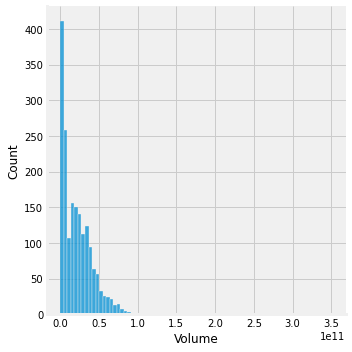

In [ ]:
#Distribucion de Volumen
sns.displot(df.Volume)
plt.show()

Refleja muchos dias poco volumen y muy pocos con grandes cantidades

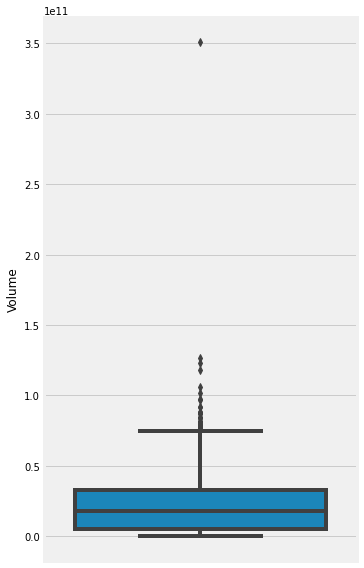

In [ ]:
from seaborn import boxplot
plt.figure(figsize=(5,10))
boxplot(data=df,y='Volume')
plt.show()

Se observan muchos outliers, uno destaca por su lejania con el resto de los datos.

En el entorno bitcoin también encontramos la figura de las ballenas, billeteras que movilizan grandes cantidades de criptomonedas. Se suele dar este nombre a los usuarios con al menos 1.000 bitcoins. Las ballenas mueven el mercado en su propio beneficio, lo que hace aún más difícil que se pueda fijar un precio objetivo. Los movimientos de estas grandes billeteras son seguidos con atención por los analistas, para intentar hacer proyecciones a futuro y anticipar tendencias.
Según Per Wimmer, fundador de Wimmer Financial LLP, el mercado de las criptomonedas está dominado principalmente por diez ballenas. “Son enormes en el mercado y ocupan mucho espacio y volumen, por lo que si se selecciona el top 10 o incluso el top 50, se cubre gran parte del volumen total. En este punto, es demasiado fácil manipular el mercado”.
Una de estas formas de manipulación es la técnica de ‘trading’ conocida con el nombre de ‘enjuague y repetición’. Mediante esta técnica, una ballena comienza a vender un gran volumen de criptomonedas a un precio por debajo del mercado, lo que dispara un momento de pánico y ventas por parte de usuarios minoristas. Una vez el precio toca fondo tras la desbandada, las ballenas aprovechan la circunstancia y vuelven a comprar más criptomonedas
Cerrando el círculo de factores, las ballenas tienen mucho poder desestabilizador porque las criptodivisas todavía no han alcanzado una adopción masiva. Una muestra más del alto grado de interrelación de los elementos que determinan el precio de las criptomonedas.

Probablemente esos outliers de volumen estén relacionados a las maniobras de estas Ballenas.

In [ ]:
#Que paso ese dia?
df.max()

Open         6.754973e+04
High         6.878962e+04
Low          6.638206e+04
Close        6.756683e+04
Adj Close    6.756683e+04
Volume       3.509679e+11
Var          2.547017e-01
dtype: float64

In [ ]:
df[df['Volume']==350967941479.0]

,Open,High,Low,Close,Adj Close,Volume,Var
Date,,,,,,,
2021-02-26,47180.464844,48370.785156,44454.84375,46339.761719,46339.761719,350967941479,-0.017819


Durante esa semana hubo declaraciones de Bill Gates desalentando el uso del Bitcoin, esos dias se derrumbó el precio y ese viernes 26/FEB fue el día en el que se plasmaron todas las especulaciones.

Algunas noticias que explican el outlier:
* https://www.semana.com/mundo/articulo/bill-gates-hace-dura-critica-sobre-el-bitcoin-esto-fue-lo-que-dijo-de-la-criptomoneda/202151/
* https://www.infobae.com/economia/2021/02/24/bill-gates-contra-bitcoin-por-que-el-fundador-de-microsoft-cree-es-una-mania-y-recomienda-mirarla-de-afuera/
* https://www.eleconomista.es/mercados-cotizaciones/noticias/11071525/02/21/Gates-contra-Musk-la-batalla-de-los-mas-ricos-por-el-bitcoin-se-enciende.html

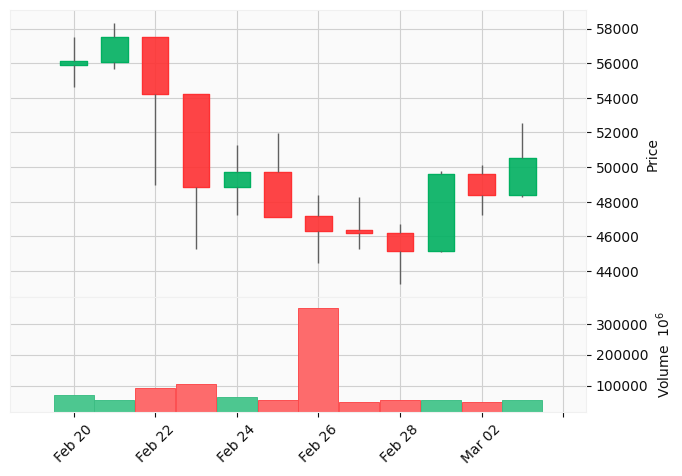

In [ ]:
#Evolucion del precio durante esos dias
mpf.plot(df.loc['2021-02-20':'2021-03-03'],style='yahoo',type='candle',volume=True)

No fue el dia con mayor variacion del precio, pero la gran cantidad operada refleja una aceptación del público a la baja producida dias anteriores.

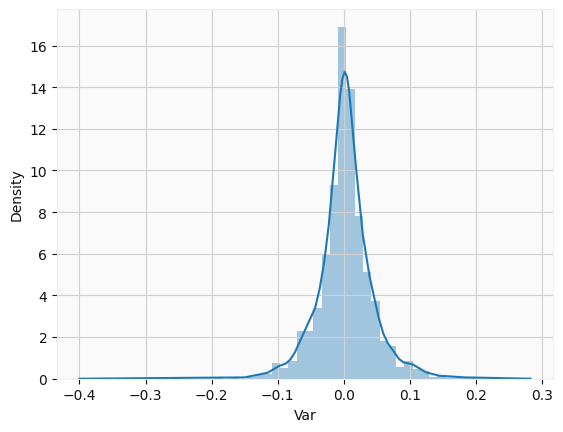

In [ ]:
#Analisis de Var
sns.distplot(df.Var)
plt.show()

Parece una distribucion normal.
Al ser una variable que representa la variacion del precio, es logico que presente una distribucion normal, ya que es menos comun que se mantengan por tiempos prolongados grandes variaciones.

##Analisis Bivariado

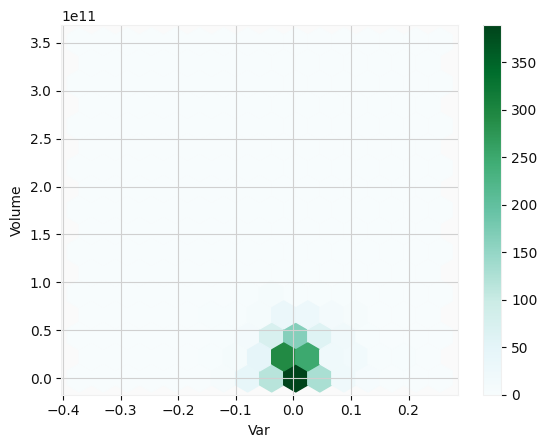

In [ ]:
#analisis de Var vs Vol
df.plot.hexbin(x='Var', y='Volume', gridsize=15)
plt.show()

La mayoria de los datos estan concentrados en dias de poco volumen y poca variacion

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2017-03-04 to 2022-03-04
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1827 non-null   float64
 1   High       1827 non-null   float64
 2   Low        1827 non-null   float64
 3   Close      1827 non-null   float64
 4   Adj Close  1827 non-null   float64
 5   Volume     1827 non-null   int64  
 6   Var        1827 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 178.7 KB


In [ ]:
#separo a la mitad los datos, para ver si hay variaciones en las relaciones
df_1ramitad=df[0:913]
df_2damitad=df[913:-1]



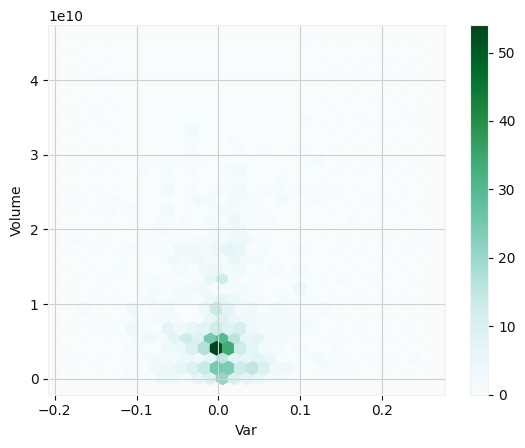

In [ ]:
df_1ramitad.plot.hexbin(x='Var', y='Volume', gridsize=30)
plt.show()

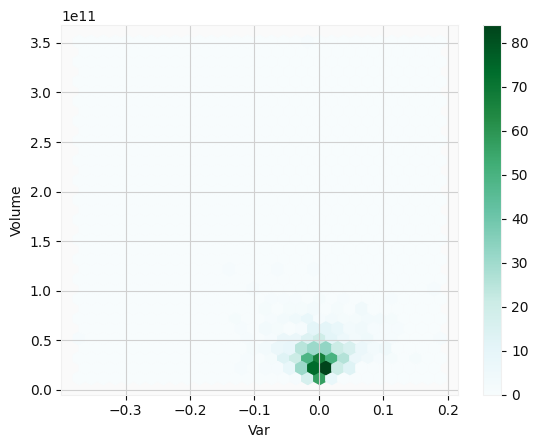

In [ ]:
df_2damitad.plot.hexbin(x='Var', y='Volume', gridsize=30)
plt.show()

La popularidad del Bitcoin está en constante aumento, esto está demostrado en estos gráficos: en la primera mitad el volumen y las variaciones están concentrados cerca del origen, en la seguna se observa un incremento del volumen y también hubo más amplitud en las variaciones diarias del precio.

## Analisis Multivariado

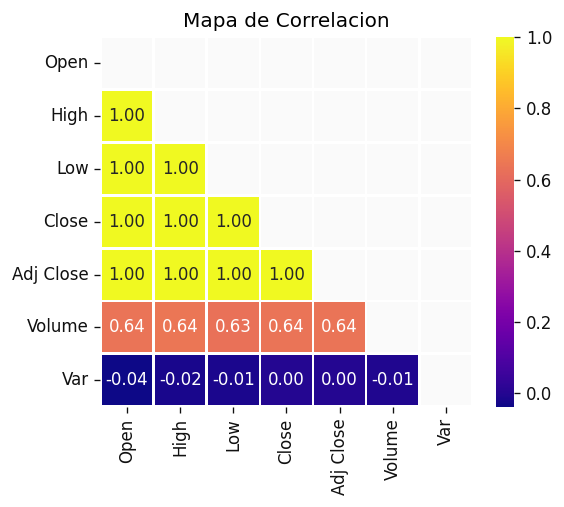

In [ ]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Mapa de Correlacion')
plt.show()

In [ ]:
#El volumen y el porcentaje de variacion tienen muy poca correlacion con el resto de las variables

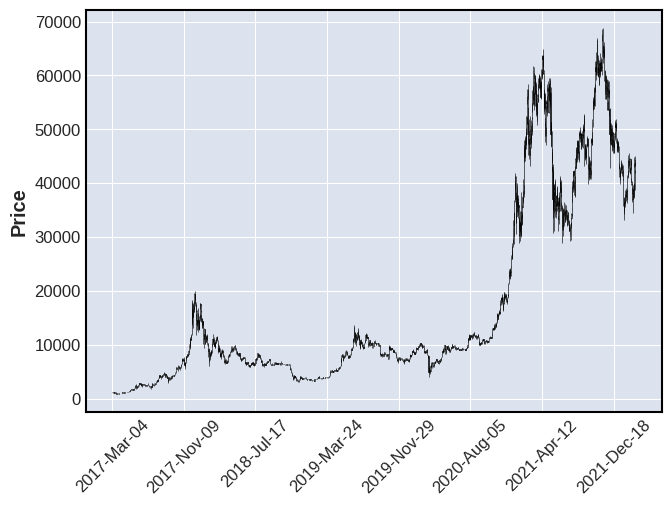

In [ ]:
#grafico de la evolucion del precio
mpf.plot(df,type='candle')

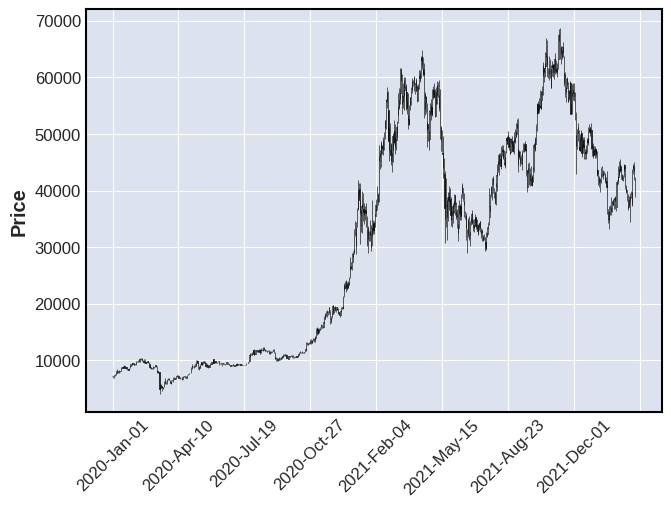

In [ ]:
#Grafico del precio desde 2020
mpf.plot(df.loc['2020-01-01':],type='candle')

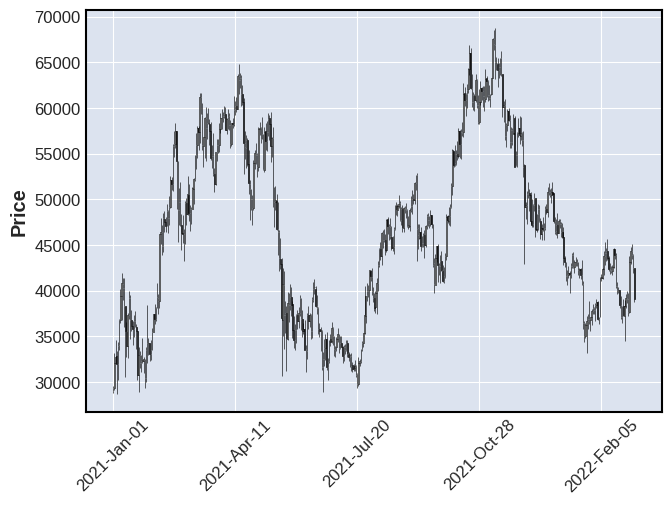

In [ ]:
#Grafico del precio desde 2021
mpf.plot(df.loc['2021-01-01':],type='candle')

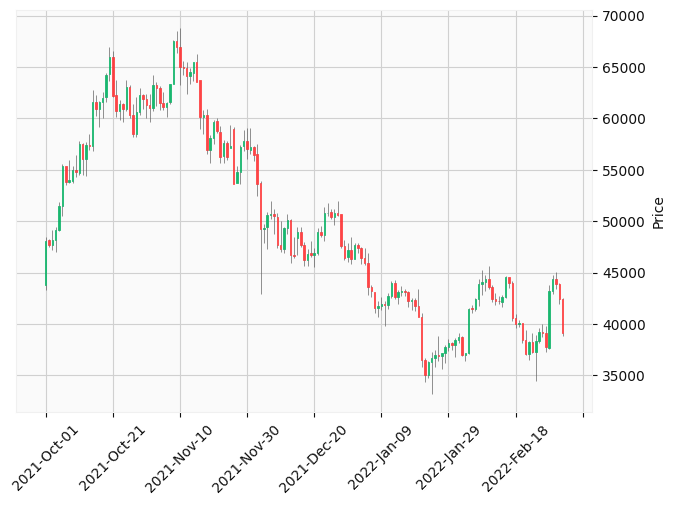

In [ ]:
#Grafico del precio desde 2021, ultimo trimestre
mpf.plot(df.loc['2021-10-01':],style='yahoo',type='candle')

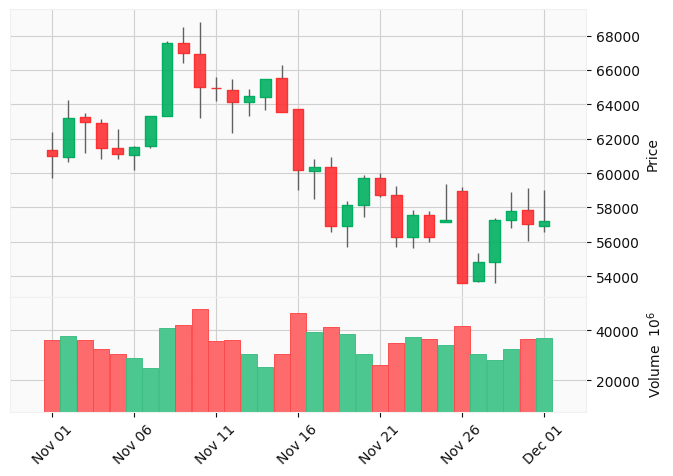

In [ ]:
#Grafico del precio de NOV 2021, con volumen
mpf.plot(df.loc['2021-11-01':'2021-12-01'],style='yahoo',type='candle',volume=True)

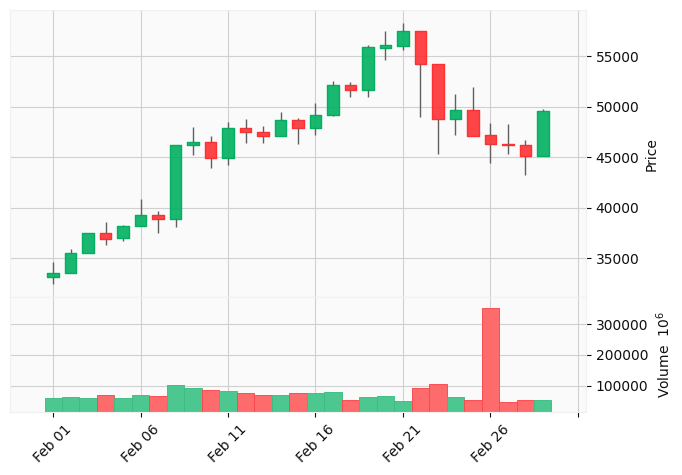

In [ ]:
#Grafico del precio de FEB 2021, con volumen
mpf.plot(df.loc['2021-02-01':'2021-03-01'],style='yahoo',type='candle',volume=True)

La economía se mueve en ciclos que se repiten una y otra vez debido a la oferta, la demanda y a las medidas que toman los gobiernos y bancos que la regulan. Los mercados de criptomonedas funcionan de forma muy parecida, pero sin que los bancos y gobiernos actúen sobre ellos. Por lo tanto, las principales influencias sobre los ciclos de mercado de Bitcoin son la oferta, la demanda y la psicología humana. Un nuevo ciclo de mercado puede tener lugar siempre que no haya eventos inesperados que afecten a los fundamentos básicos de una criptomoneda.

## Variable Objetivo

Disponemos de diferentes datos de precios del Bitcoin en un mismo dia (Apertura, Maximo, Minimo y Cierre), pero, el precio de cierre es el mas difundido y adoptado como valor de referencia por la gran mayoria de sitios y publicaciones financieras. Esa sera nuestra variable objetivo.

Para implementar algoritmos de machine learning, los principales componentes de nuestro dataset son las columnas 'Date' y 'Close', pero no eliminamos los otros datos porque pueden se de utilidad en el futuro.

## Algoritmos Candidatos

Para este tipo de predicciones es necesario utilizar algoritmos de series de tiempo. Los candidatos son los siguientes:


*   Prophet: modelo desarrollado por Facebook, pronostica series de tiempo no lineales basandose en un modelo aditivo. Procesa bien datos ausentes y outliers.

*   LSTM: Modelo derivado de redes recurrentes, basicamente puede 'recordar' estados previos y utilizar esta información para decidir cuál será el siguiente. Son redes con 'loops' dentro, permitiendo a la informacion persistir. Las LSTM pueden aprender dependencias largas, por lo que se podría decir que tienen una «memoria» a más largo plazo.

*   ARIMA: Modelo estadístico que utiliza variaciones y regresiones de datos estadísticos con el fin de encontrar patrones para una predicción hacia el futuro. Se trata de un modelo dinámico de series temporales, es decir, las estimaciones futuras vienen explicadas por los datos del pasado y no por variables independientes.



### Prueba de Prophet

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Var
Date,,,,,,,
2017-03-04,1277.430054,1279.400024,1230.510010,1255.150024,1255.150024,183270000,-0.017441
2017-03-05,1254.290039,1267.290039,1238.060059,1267.119995,1267.119995,134127000,0.010229
2017-03-06,1267.469971,1276.000000,1264.599976,1272.829956,1272.829956,153656992,0.004229
2017-03-07,1273.209961,1275.550049,1204.800049,1223.540039,1223.540039,291256000,-0.039012
2017-03-08,1223.229980,1232.160034,1148.079956,1150.000000,1150.000000,332603008,-0.059866


In [ ]:
#creo dataframe con las columnas de nuestro dataset original Date y Close
df_prophet=df.drop(['Open','High','Low','Adj Close','Volume','Var'],axis='columns')
df_prophet.head()

,Close
Date,
2017-03-04,1255.150024
2017-03-05,1267.119995
2017-03-06,1272.829956
2017-03-07,1223.540039
2017-03-08,1150.000000


In [ ]:
#saco la fecha del indice y la paso a columna
df_prophet=df_prophet.reset_index(level=0)

In [ ]:
#renombro la columna 'Close' a 'y' para el modelo y 'Date' a 'ds'
df_prophet.rename(columns={'Close':'y','Date':'ds'},inplace=True)

In [ ]:
df_prophet

,ds,y
0,2017-03-04,1255.150024
1,2017-03-05,1267.119995
2,2017-03-06,1272.829956
3,2017-03-07,1223.540039
4,2017-03-08,1150.000000
...,...,...
1822,2022-02-28,43193.234375
1823,2022-03-01,44354.636719
1824,2022-03-02,43924.117188
1825,2022-03-03,42451.789063


In [ ]:
#creo el objeto
fbp=Prophet(daily_seasonality=True)

In [ ]:
#entreno el modelo
fbp.fit(df_prophet)

In [ ]:
#Genero prediccion
future=fbp.make_future_dataframe(periods=365)
forecast=fbp.predict(future)

In [ ]:
#importo libreria de plot de facebook
from fbprophet.plot import plot_plotly, plot_forecast_component_plotly

In [ ]:
#plot
plot_plotly(fbp,forecast)

In [ ]:
#Si bien las tendencias son detectadas correctamente, en nuestra opinión lo hace vagamente.

### Prueba de LSTM

In [ ]:
df=pd.read_csv('/content/YF BTC-USD.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-04,1277.430054,1279.400024,1230.510010,1255.150024,1255.150024,183270000
1,2017-03-05,1254.290039,1267.290039,1238.060059,1267.119995,1267.119995,134127000
2,2017-03-06,1267.469971,1276.000000,1264.599976,1272.829956,1272.829956,153656992
3,2017-03-07,1273.209961,1275.550049,1204.800049,1223.540039,1223.540039,291256000
4,2017-03-08,1223.229980,1232.160034,1148.079956,1150.000000,1150.000000,332603008


In [ ]:
df=df.set_index('Date')

In [ ]:
#solo columna Close
data=df.filter(['Close'])

In [ ]:
data

,Close
Date,
2017-03-04,1255.150024
2017-03-05,1267.119995
2017-03-06,1272.829956
2017-03-07,1223.540039
2017-03-08,1150.000000
...,...
2022-02-28,43193.234375
2022-03-01,44354.636719
2022-03-02,43924.117188


In [ ]:
#convierto a np array

In [ ]:
dataset=data.values

In [ ]:
#numero de datos para train
trainig_data_len=math.ceil(len(dataset)*0.8)  #redondea

In [ ]:
trainig_data_len

1462

In [ ]:
#scale data para obtener mejores resultados
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [ ]:
scaled_data

array([[0.00476712],
       [0.00494677],
       [0.00503247],
       ...,
       [0.64516049],
       [0.62306319],
       [0.57332256]])

In [ ]:
#training dataset
#create scaled training data set
train_data=scaled_data[0:trainig_data_len,:]
#split data
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00476712, 0.00494677, 0.00503247, 0.00429271, 0.00318899,
       0.00376666, 0.00268951, 0.00357665, 0.00426029, 0.00441848,
       0.00453974, 0.00468397, 0.00375646, 0.00244202, 0.00054477,
       0.00148913, 0.00175163, 0.00274684, 0.00167524, 0.0015169 ,
       0.        , 0.00052918, 0.00043832, 0.00162466, 0.00164537,
       0.00153761, 0.0013344 , 0.00201518, 0.0021459 , 0.00247114,
       0.00309609, 0.0029376 , 0.00281048, 0.00367946, 0.00359271,
       0.00357845, 0.00375736, 0.00374625, 0.0040146 , 0.00394496,
       0.00347835, 0.00345223, 0.00352698, 0.00368336, 0.00384801,
       0.00411456, 0.00409384, 0.00437585, 0.00427034, 0.00441532,
       0.00404762, 0.00469208, 0.00492231, 0.00515629, 0.00570635,
       0.00568759, 0.00576728, 0.006159  , 0.00726527, 0.00773383])]
[0.008293196518403198]



In [ ]:
#convert train data to np array
x_train,y_train=np.array(x_train),np.array(y_train)


In [ ]:
x_train.shape

(1402, 60)

In [ ]:
#reshape porque el modelo espera 3d
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1402, 60, 1)

In [ ]:
#build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1402/1402 [==============================] - 60s 36ms/step - loss: 0.0013


In [ ]:
#create test dataset
test_data=scaled_data[trainig_data_len-60:,:]


In [ ]:
x_test=[]
y_test=dataset[trainig_data_len:,:]

In [ ]:
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#convert data into np array
x_test=np.array(x_test)

In [ ]:
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#predicciones
predictions=model.predict(x_test)
#transformar al original
predictions=scaler.inverse_transform(predictions)

In [ ]:
#root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

12897.31088388767

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

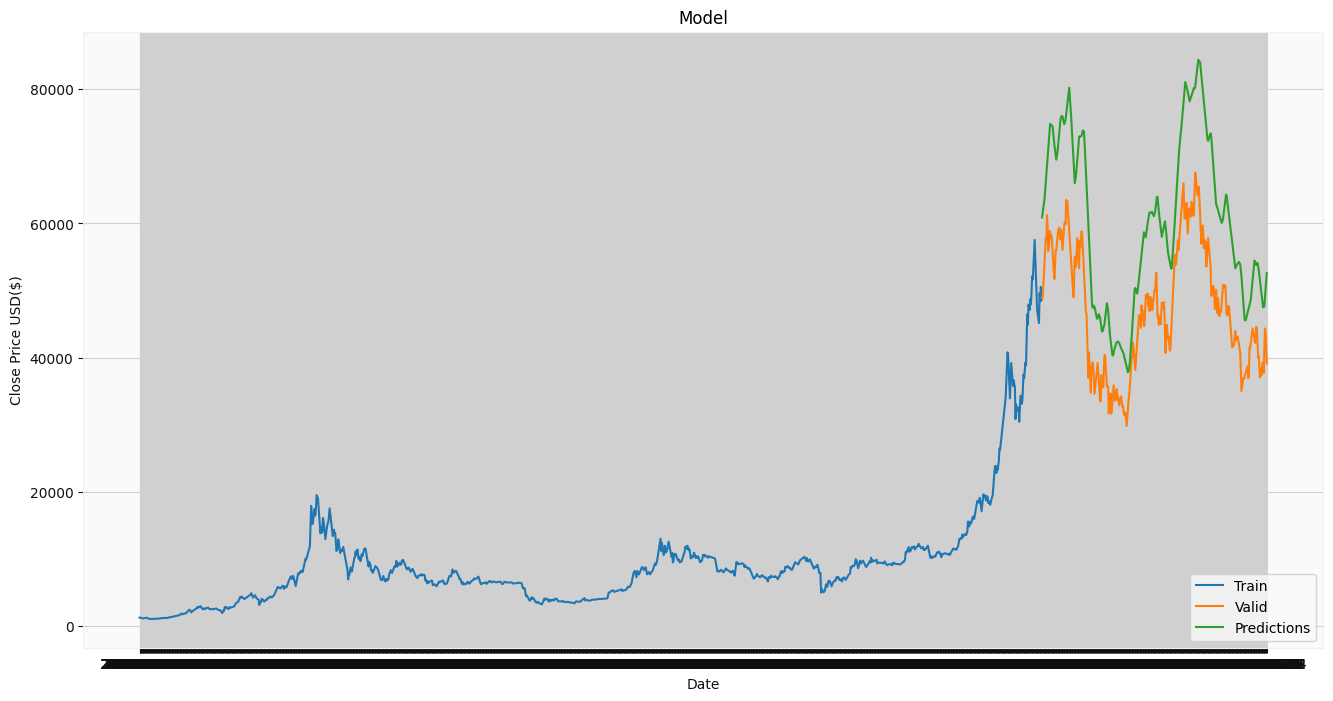

In [ ]:
#plot
train=data[:trainig_data_len]
valid=data[trainig_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'],loc='lower right')
plt.show()

In [ ]:
#si bien no es exacto, predice de forma aceptable los movimientos del mercado.

In [ ]:
#show valid and predicted
valid

,Close,Predictions
Date,,
2021-03-05,48927.304688,60895.636719
2021-03-06,48912.382813,61451.179688
2021-03-07,51206.691406,61919.304688
2021-03-08,52246.523438,62673.964844
2021-03-09,54824.117188,63664.933594
...,...,...
2022-02-28,43193.234375,47621.304688
2022-03-01,44354.636719,48498.570312
2022-03-02,43924.117188,49950.683594


### Prueba de ARIMA

In [ ]:
#TUTORIAL DE YOUTUBBE  https://www.youtube.com/watch?v=gqryqIlvEoM

In [ ]:
#Chequear si la data es estacional usando AUGUMENTENDED DICKEY FUELER TEST

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result=adfuller(df['Close'])
print(f"ADF Statistic:{result[0]}")
print(f"p-value:{result[1]}")

ADF Statistic:-1.111139823502526
p-value:0.7106090884153224


In [ ]:
#determina uno de los parametro para ARIMA MODEL, hay que encontrar la cantidad de intervalos de tiempo para que los datos sean estacionarios  (q)

In [ ]:
#Autocorrelation funcion
#determina uno de los parametro para ARIMA MODEL, hay que encontrar la cantidad de intervalos de tiempo para que los datos sean estacionarios

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


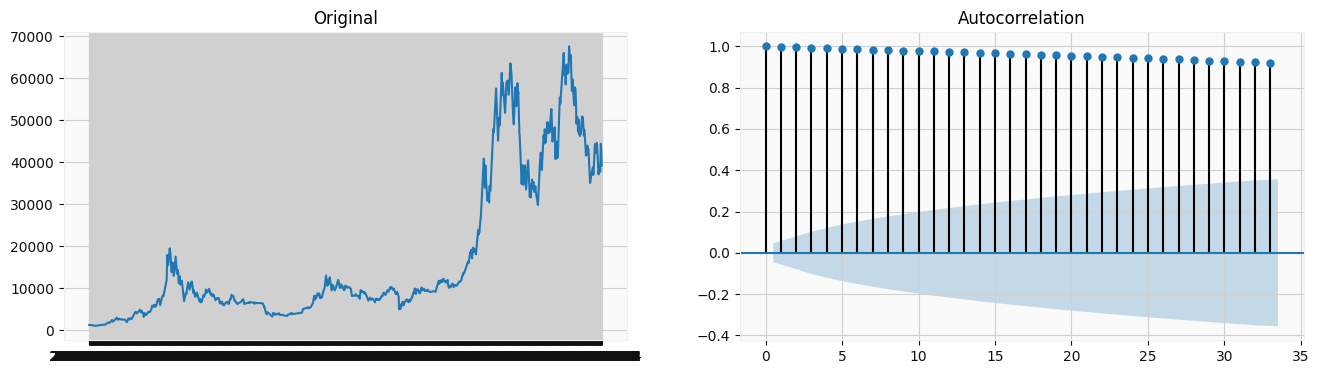

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(df['Close'])
ax1.set_title('Original')
plot_acf(df['Close'],ax=ax2);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


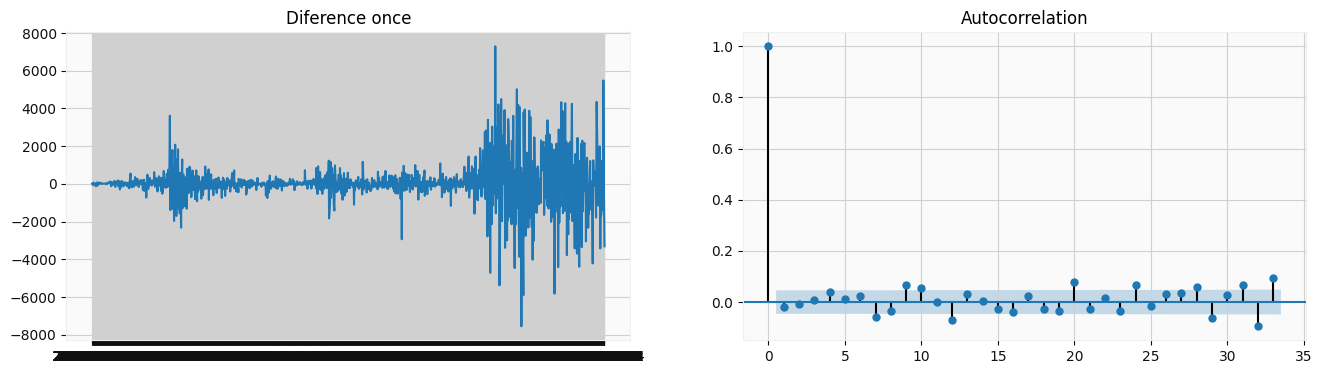

In [ ]:
#difrencio 1 vez

diff=df['Close'].diff().dropna()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Diference once')
plot_acf(diff,ax=ax2);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


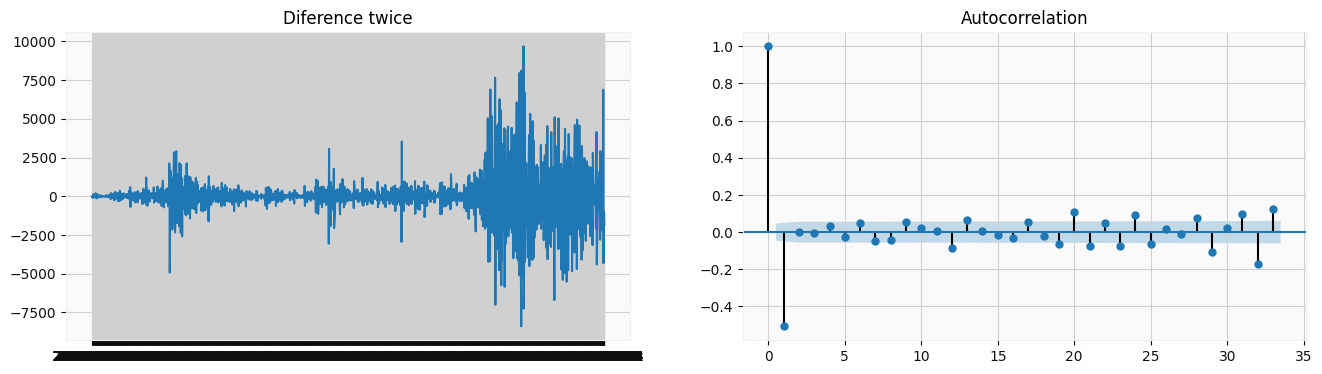

In [ ]:
#diferencio 2 veces
diff=df['Close'].diff().diff().dropna()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Diference twice')
plot_acf(diff,ax=ax2);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


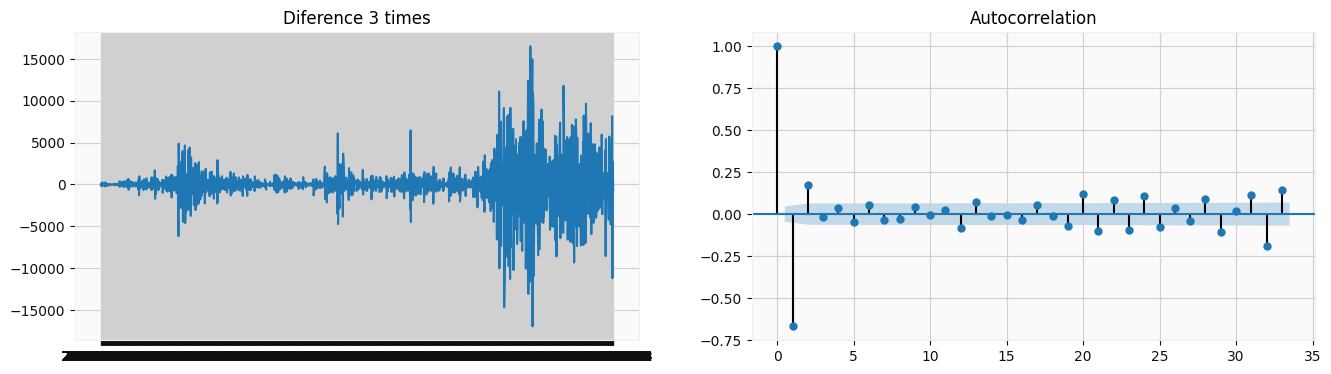

In [ ]:
#diferencio 3 veces
diff=df['Close'].diff().diff().diff().dropna()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Diference 3 times')
plot_acf(diff,ax=ax2);

In [ ]:
#eligo el order of differencing as 1

P
es el orden del AutoRegressive (AR) Term, refiere el numero de lags usados como predictores
se determina mirando el Partial Autocorrelation Plot
representa la relacion entre series y sus lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


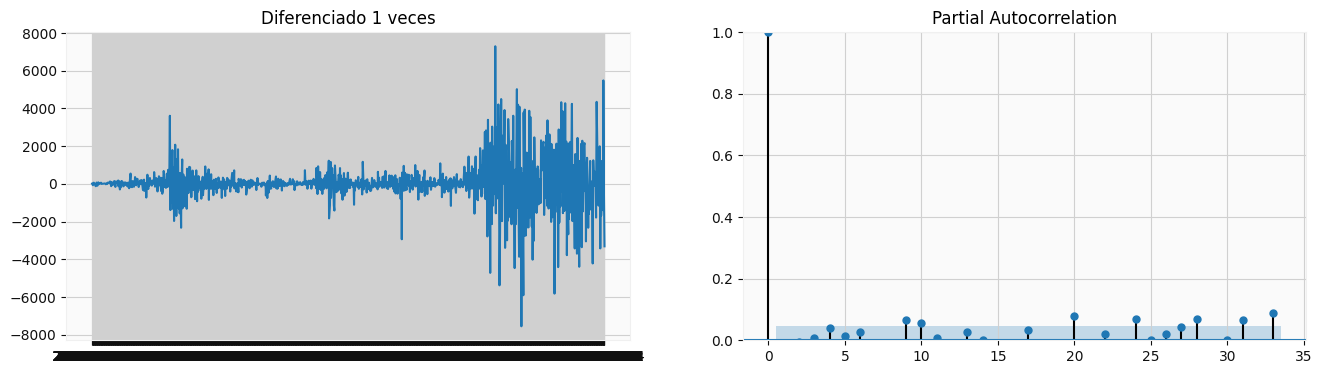

In [ ]:
diff=df['Close'].diff().dropna() #usamos 1 diferencias pq es el que elegimos
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Diferenciado 1 veces')
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

In [ ]:
#hay que elegir algun valor que este por encima del area azul

In [ ]:
#se observa el ACF plot para determinarlo

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


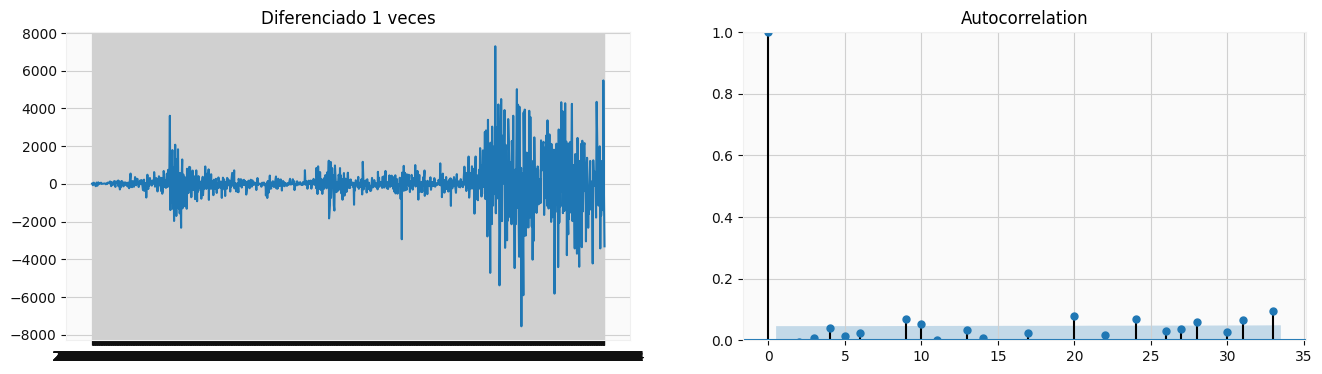

In [ ]:
diff=df['Close'].diff().dropna() #usamos 1 diferencias pq es el que elegimos
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Diferenciado 1 veces')
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

In [ ]:
#valor que este en el limite del area azul
#4 parece buen valor

In [ ]:
#FITTING ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['Close'],order=(6,1,3))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1826
Model:                 ARIMA(6, 1, 3)   Log Likelihood              -15108.709
Method:                       css-mle   S.D. of innovations            948.671
Date:                Sat, 16 Apr 2022   AIC                          30239.418
Time:                        17:20:20   BIC                          30300.027
Sample:                    03-05-2017   HQIC                         30261.775
                         - 03-04-2022                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            20.7439     23.450      0.885      0.376     -25.218      66.705
ar.L1.D.Close    -0.2130      0.329     -0.648      0.517      -0.857       0.431
ar.L2.D.Close    -0.9704      0.072    -

<Figure size 1600x800 with 0 Axes>

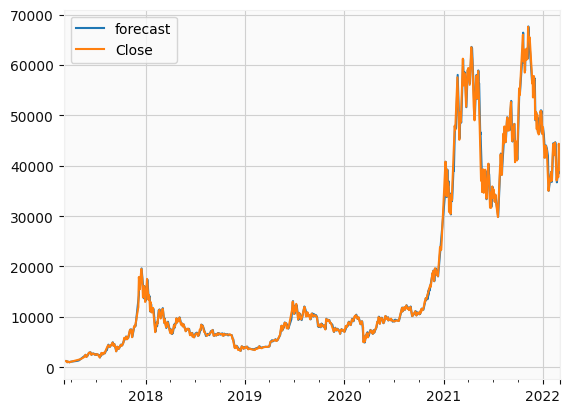

In [ ]:
#actual vs fitted
plt.figure(figsize=(16,8))
result.plot_predict(dynamic=False,);

In [ ]:
#parece una buena prediccion

## Hyperparameter Tuning y Comparacion de Modelos

Los modelos Prophet y ARIMA nos parecen los mas adecuados para nuestro análisis. La predicción realizada por el modelo LSTM está muy lejos de los datos reales. El primer dato predecido, que deberia ser el más exacto, se encuentra a gran distancia de lo que se consideraría un pronóstico aceptable.

### Prophet

In [ ]:
#https://www.kaggle.com/code/manovirat/timeseries-using-prophet-hyperparameter-tuning/notebook

In [ ]:
#Separo en train y test
end_date = '2021-12-31'
mask1 = (df_prophet['ds'] <= end_date)
mask2 = (df_prophet['ds'] > end_date)

In [ ]:
X_tr = df_prophet.loc[mask1]
X_tst = df_prophet.loc[mask2]
print("train shape",X_tr.shape)
print("test shape",X_tst.shape)

train shape (1764, 2)
test shape (63, 2)


In [ ]:
#parameter grid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 30


Analizamos resultados de los 30 modelos posibles

In [ ]:
#defino mape para usar en grid search
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
strt='2017-03-03'
end='2021-12-31'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True, 
                         interval_width=0.95)
    train_model.fit(X_tr)
    train_forecast = train_model.make_future_dataframe(periods=X_tst.shape[0], freq='D',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = df_prophet[(df_prophet['ds']>strt) & (df_prophet['ds']<=end)]
    MAPE = mean_absolute_percentage_error(Actual['y'][(-test['yhat'].shape[0]-1):-1],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 25.887059810977785
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 19.439284476052983
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 26.330811186812436
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 19.74716462768935
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 26.39705862366043
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additiv

In [ ]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,MAPE,Parameters
0,19.439284,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."
1,19.747165,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."
2,19.847570,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."
3,20.622329,"{'changepoint_prior_scale': 0.5, 'n_changepoin..."
4,21.142828,"{'changepoint_prior_scale': 0.5, 'n_changepoin..."


In [ ]:
#la mejor de las 30 combinaciones
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.1,
 'n_changepoints': 100,
 'seasonality_mode': 'additive'}

In [ ]:
#modelo nuevo
final_model = Prophet(changepoint_prior_scale= 0.1,
                      n_changepoints = 100,
                      seasonality_mode = 'additive',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
final_model.fit(X_tr)

In [ ]:
future = final_model.make_future_dataframe(periods=60, freq='D')
forecast = final_model.predict(future)

In [ ]:
#plot
plot_plotly(final_model,forecast)

In [ ]:
PROPHET_ERROR=parameters['MAPE'][0]

### ARIMA

Los hyperparametros de este modelo fueron determinados evaluando los graficos, dieron muy buenos resultados.

In [ ]:
#ARIMA con X_tr y X_tst

In [ ]:
df.index

Index(['2017-03-04', '2017-03-05', '2017-03-06', '2017-03-07', '2017-03-08',
       '2017-03-09', '2017-03-10', '2017-03-11', '2017-03-12', '2017-03-13',
       ...
       '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27',
       '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04'],
      dtype='object', name='Date', length=1827)

In [ ]:
end_date = '2021-12-31'
mask3 = (df.index <= end_date)
mask4 = (df.index > end_date)

In [ ]:
X_tr_arima = df.loc[mask3]
X_tst_arima = df.loc[mask4]
print("train shape",X_tr_arima.shape)
print("test shape",X_tst_arima.shape)

train shape (1764, 6)
test shape (63, 6)


In [ ]:
#nuevo modelo
model2=ARIMA(X_tr_arima['Close'],order=(6,1,3))
result=model2.fit(disp=0)

<Figure size 1600x800 with 0 Axes>

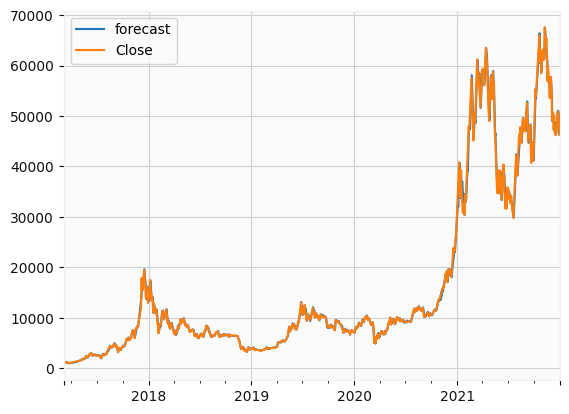

In [ ]:
#actual vs fitted
plt.figure(figsize=(16,8))
result.plot_predict(dynamic=False,);

In [ ]:
step=63 #cantidad de periodos a predecir(mismos que x_tst)
fc,se,conf=result.forecast(step) #pronostico, error estrandar, confianza - maximos y minimos-

In [ ]:
fc=pd.Series(fc,index=test[:step].index)

In [ ]:
fc

0     46395.895022
1     46284.674472
2     46015.524146
3     46091.824728
4     46409.966208
          ...     
58    47548.859210
59    47557.943938
60    47602.084999
61    47639.274977
62    47645.949058
Length: 63, dtype: float64

In [ ]:
X_tst_arima['Close']

Date
2022-01-01    47686.812500
2022-01-02    47345.218750
2022-01-03    46458.117188
2022-01-04    45897.574219
2022-01-05    43569.003906
                  ...     
2022-02-28    43193.234375
2022-03-01    44354.636719
2022-03-02    43924.117188
2022-03-03    42451.789063
2022-03-04    39137.605469
Name: Close, Length: 63, dtype: float64

### Metricas

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#todas las metricas en Prophet
prophet_mean_absolute_percentage_error=mean_absolute_percentage_error(Actual['y'][(-test['yhat'].shape[0]-1):-1],forecast['yhat'][1700:1763])
print('Mean absolute percentage error de Prophet: ',prophet_mean_absolute_percentage_error)

Mean absolute percentage error de Prophet:  0.11017151557611249


In [ ]:
prophet_mean_squared_error=mean_squared_error(Actual['y'][(-test['yhat'].shape[0]-1):-1],forecast['yhat'][1700:1763])
print('Mean squared error de Prophet: ',prophet_mean_squared_error)

Mean squared error de Prophet:  46189728.8804475


In [ ]:
prophet_mean_absolute_error=mean_absolute_error(Actual['y'][(-test['yhat'].shape[0]-1):-1],forecast['yhat'][1700:1763])
print('Mean absolute error de Prophet: ',prophet_mean_absolute_error)

Mean absolute error de Prophet:  6100.78924468953


In [ ]:
#todas las metricas en ARIMA
arima_mean_absolute_percentage_error=mean_absolute_percentage_error(X_tst_arima['Close'],fc)
print('Mean absolute percentage error de ARIMA: ',arima_mean_absolute_percentage_error)

Mean absolute percentage error de ARIMA:  0.15011213557179506


In [ ]:
arima_mean_squared_error=mean_squared_error(X_tst_arima['Close'],fc)
print('Mean squared error de ARIMA: ',arima_mean_squared_error)

Mean squared error de ARIMA:  43785215.47907769


In [ ]:
arima_mean_absolute_error=mean_absolute_error(X_tst_arima['Close'],fc)
print('Mean absolute error de ARIMA: ',arima_mean_absolute_error)

Mean absolute error de ARIMA:  5911.867789225334


### Comparacion de modelos

In [ ]:
#Es mayor el Mean Absolute Percentage Error del modelo Prophet?
prophet_mean_absolute_percentage_error>arima_mean_absolute_percentage_error

False

In [ ]:
#Es mayor el Mean Squared Error del modelo Prophet?
prophet_mean_squared_error>arima_mean_squared_error

True

In [ ]:
#Es mayor el Mean Absolute Error del modelo Prophet?
prophet_mean_absolute_error>arima_mean_absolute_error

True

Los resultados del modelo ARIMA son más acertados.